In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-dataset/world_population.csv
/kaggle/input/world-population-dataset/List of the Countries and Territories.txt


In [2]:
population = pd.read_csv("../input/world-population-dataset/world_population.csv")

In [5]:
population.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Capital                      234 non-null    object 
 3   Continent                    234 non-null    object 
 4   2022                         234 non-null    int64  
 5   2020                         234 non-null    int64  
 6   2015                         234 non-null    int64  
 7   2010                         234 non-null    int64  
 8   2000                         234 non-null    int64  
 9   1990                         234 non-null    int64  
 10  1980                         234 non-null    int64  
 11  1970                         234 non-null    int64  
 12  Area (km²)                   234 non-null    int64  
 13  Density (p

In [6]:
population.set_index("Country", inplace=True)

In [7]:
population.rename(columns = {
 '2022 Population': "2022",
 '2020 Population': "2020",
 '2015 Population': "2015",
 '2010 Population': "2010",
 '2000 Population': "2000",
 '1990 Population': "1990",
 '1980 Population': "1980",
 '1970 Population': "1970"}, inplace = True)

**Let's take a look which countries had the biggest population in 2022.**

Country
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Name: 2022, dtype: int64


<AxesSubplot:title={'center':'Countries with the biggest population'}, xlabel='Country', ylabel='population (in billions)'>

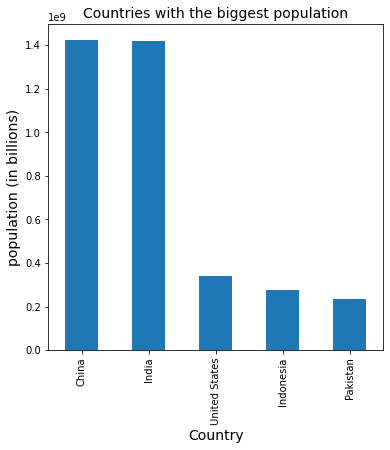

In [10]:
print(population["2022"].nlargest())
plt.figure(figsize=(6,6))
plt.title("Countries with the biggest population",fontsize=14)
plt.ylabel("population (in billions)",fontsize=14)
plt.xlabel("countries)",fontsize=14)
population["2022"].nlargest().plot(kind="bar")

In [23]:
china = population.loc["China"]
india = population.loc["India"]
densindia = india["Density (per km²)"]
denschina = china["Density (per km²)"]

print(f"The population density per km² in India is {round(densindia)}")
print(f"The population density per km² in China is {round(denschina)}")

The population density per km² in India is 431
The population density per km² in China is 147


**The density of the population is way bigger in India.**

**Let's plot the growth of the population for the last 50 years in China and India.**

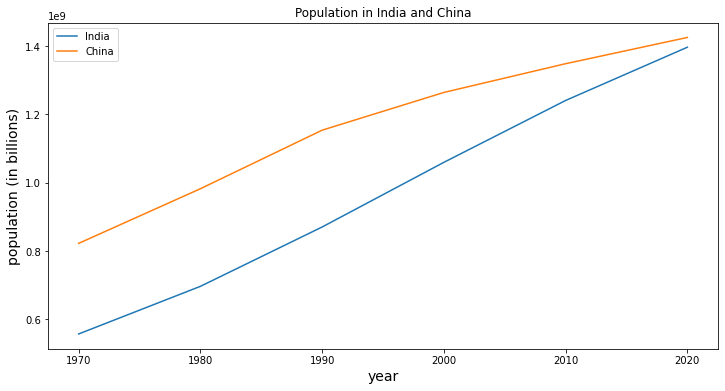

In [18]:
time = ["1970", "1980", "1990", "2000", "2010", "2020"]
plt.figure(figsize=(12,6))
plt.title("Population in India and China")
plt.xlabel("year", fontsize=14)
plt.ylabel("population (in billions)",fontsize=14)
sns.lineplot(x=time, y=india[time], label="India")
sns.lineplot(x=time, y=china[time], label="China")
plt.legend()
plt.show()

**Let's predict the future to see how the population of both countries is likely to evolve itself.**

In [22]:
population["2030"] = population["2020"] * (population["Growth Rate"] ** 10)
population["2040"] = population["2020"] * (population["Growth Rate"] ** 20)
population["2050"] = population["2020"] * (population["Growth Rate"] ** 30)

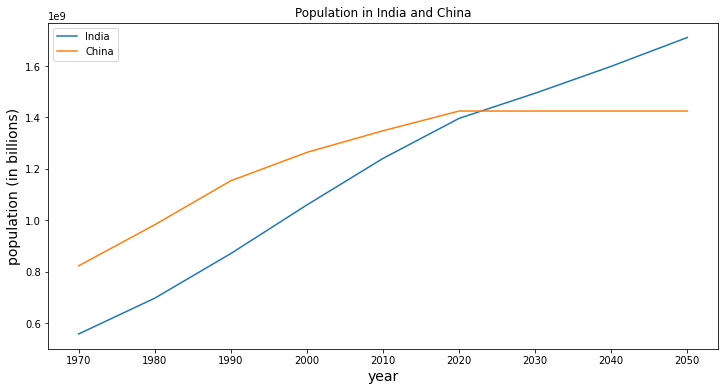

In [24]:
time = ["1970","1980","1990","2000","2010","2020", '2030', '2040', '2050']
plt.figure(figsize=(12,6))
plt.title("Population in India and China")
plt.xlabel("year", fontsize=14)
plt.ylabel("population (in billions)",fontsize=14)
sns.lineplot(x=time, y=india[time],label="India")
sns.lineplot(x=time, y=china[time], label="China")
plt.show()

**As visible in the latest graph, the population of India will very soon overtake the population of China. According to this numbers, I want to calculate in which year this excactly will be. It is not clear out of the graph. Let's calculate the intersection.**

In [25]:
for x in range(5):
    print(f"India {2020 + x}:")
    print(round(india["2020"] * india["Growth Rate"]**x))
    print(f"China {2020 + x}:")
    print(round(china["2020"] * china["Growth Rate"]**x))
    print()

India 2020:
1396387127
China 2020:
1424929781

India 2021:
1405882559
China 2021:
1424929781

India 2022:
1415442561
China 2022:
1424929781

India 2023:
1425067570
China 2023:
1424929781

India 2024:
1434758030
China 2024:
1424929781



**According to this numbers, 2023 will be the first year that India has more inhabitants then China and the most inhabitants in the world.**

**Let's see how the world population as a whole evolved itself and how the share of inhabitants of India and China related to that over time. For the past and the future (1970-2050).**

In [26]:
total1970 = round(population['1970'].sum())
total1980 = round(population['1980'].sum())
total1990 = round(population['1990'].sum())
total2000 = round(population['2000'].sum())
total2010 = round(population['2010'].sum())
total2020 = round(population['2020'].sum())
total2030 = round(population['2030'].sum())
total2040 = round(population['2040'].sum())
total2050 = round(population['2050'].sum())
total = [total1970,total1980,total1990,total2000,total2010,total2020,total2030,total2040,total2050]

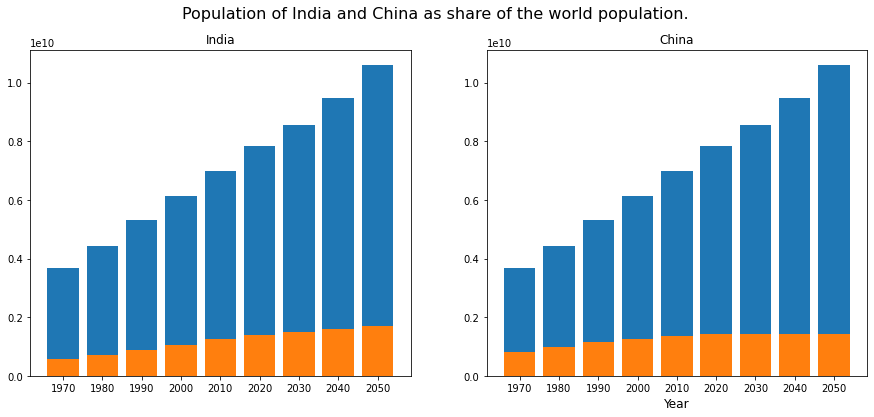

In [27]:
plt.figure(figsize=(15,6))
plt.suptitle("Population of India and China as share of the world population.", fontsize=16)
plt.subplot(1,2,1)
plt.title("India",fontsize=12)
plt.bar(time, total)  
plt.bar(time, india[time])
plt.subplot(1,2,2)
plt.title("China",fontsize=12)
plt.bar(time, total)  
plt.bar(time, china[time])
plt.xlabel("Year",fontsize=12)
plt.show()